In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
data = pd.read_excel("C:/Users/Gowri/OneDrive/Desktop/ISRO PROJECT/parmeters.xlsx")
data

,T,M,H
0,30,71,98
1,33,72,98
2,30,71,98
3,30,71,99
4,30,75,98
...,...,...,...
106742,24,17,8
106743,24,17,12
106744,24,17,12
106745,24,17,14


In [60]:
data[data["H"]>=5]

,T,M,H
0,30,71,98
1,33,72,98
2,30,71,98
3,30,71,99
4,30,75,98
...,...,...,...
106742,24,17,8
106743,24,17,12
106744,24,17,12
106745,24,17,14


In [61]:
data['zone'] = ""
data.loc[data.H < 20, 'zone'] = 'arid'
data.loc[(data.H>=20) & (data.H<50), 'zone'] = 'semi arid'
data.loc[(data.H >=50) & (data.H<75), 'zone'] = 'sub humid'
data.loc[data.H >=75, 'zone'] = 'humid'

# Method 2
Kc values at : Initial | Crop development | Mid-season | Harvest stages\
Cotton - Humid\
Kc : 0.45 0.75 1.15 0.75

Millet/Sorghum - Arid\
Kc : 0.35 0.75 1.10 0.65

In [62]:
data['period'] = ""
data.loc[data.H < 20, 'period'] = 'harvest'
data.loc[(data.H>=20) & (data.H<45), 'period'] = 'midseason'
data.loc[(data.H >=45) & (data.H<=90), 'period'] = 'crop dev'
data.loc[data.H >90, 'period'] = 'sow'

In [63]:
data

,T,M,H,zone,period
0,30,71,98,humid,sow
1,33,72,98,humid,sow
2,30,71,98,humid,sow
3,30,71,99,humid,sow
4,30,75,98,humid,sow
...,...,...,...,...,...
106742,24,17,8,arid,harvest
106743,24,17,12,arid,harvest
106744,24,17,12,arid,harvest
106745,24,17,14,arid,harvest


## MILLET

In [64]:
data.loc[data["period"]=="sow" , "kc"] = 0.35
data.loc[data["period"]=="crop dev","kc"] = 0.75
data.loc[data["period"]=="midseason","kc"] = 1.10
data.loc[data["period"]=="harvest","kc"] = 0.65


In [65]:
data.loc[(data["T"]<25) & (data["zone"]=="humid") , "ETo"] = 3.5
data.loc[(data["T"]>=25) & (data["zone"]=="humid"), "ETo"] = 5.5

data.loc[(data["T"]<25) & (data["zone"]=="sub humid"), "ETo"] = 5.5
data.loc[(data["T"]>=25) & (data["zone"]=="sub humid"), "ETo"] = 7.5

data.loc[(data["T"]<25) & (data["zone"]=="semi arid"), "ETo"] = 6.5
data.loc[(data["T"]>=25) & (data["zone"]=="semi arid"), "ETo"] = 8.5

data.loc[(data["T"]<25) & (data["zone"]=="arid"), "ETo"] = 7.5
data.loc[(data["T"]>=25) & (data["zone"]=="arid"), "ETo"] = 9.5

In [66]:
data["Etc"] = data["kc"]*data["ETo"]
data

,T,M,H,zone,period,kc,ETo,Etc
0,30,71,98,humid,sow,0.35,5.5,1.925
1,33,72,98,humid,sow,0.35,5.5,1.925
2,30,71,98,humid,sow,0.35,5.5,1.925
3,30,71,99,humid,sow,0.35,5.5,1.925
4,30,75,98,humid,sow,0.35,5.5,1.925
...,...,...,...,...,...,...,...,...
106742,24,17,8,arid,harvest,0.65,7.5,4.875
106743,24,17,12,arid,harvest,0.65,7.5,4.875
106744,24,17,12,arid,harvest,0.65,7.5,4.875
106745,24,17,14,arid,harvest,0.65,7.5,4.875


In [67]:
data_sow = data[data["period"]=="sow"]
data_dev = data[data["period"]=="crop dev"]
data_mid = data[data["period"]=="midseason"]
data_harvest = data[data["period"]=="harvest"]


avg_sow = data_sow["M"].mean()
sow_water = (data_sow["Etc"]-(abs(data_sow["M"]-avg_sow)/100)).sum()
avg_dev = data_dev["M"].mean()
dev_water = (data_dev["Etc"]-(abs(data_dev["M"]-avg_dev)/100)).sum()
avg_mid = data_mid["M"].mean()
mid_water = (data_mid["Etc"]-(abs(data_mid["M"]-avg_mid)/100)).sum()
avg_harvest = data_harvest["M"].mean()
harvest_water = (data_harvest["Etc"]-(abs(data_harvest["M"]-avg_harvest)/100)).sum()
water_millet = sow_water+dev_water+mid_water+harvest_water
water_millet

346412.7449932465

<BarContainer object of 4 artists>

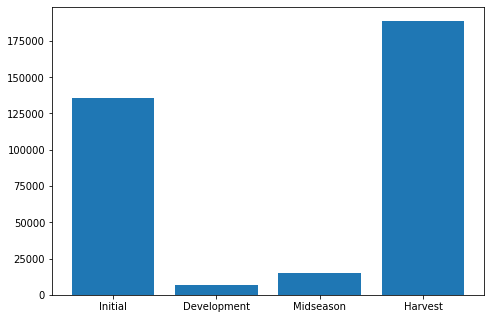

In [68]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [sow_water,dev_water,mid_water,harvest_water]
ax.bar(season,amt)

## SUGARCANE

712191.3949932465


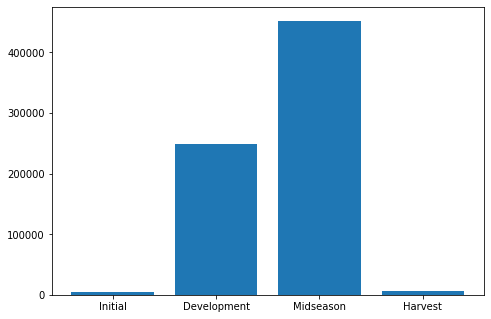

In [53]:
data['period'] = ""
data.loc[data.H < 20, 'period'] = 'crop dev'
data.loc[(data.H>=20) & (data.H<45), 'period'] = 'sow'
data.loc[(data.H >=45) & (data.H<=90), 'period'] = 'harvest'
data.loc[data.H >90, 'period'] = 'midseason'

data.loc[data["period"]=="sow" , "kc"] = 0.40
data.loc[data["period"]=="crop dev","kc"] = 0.85
data.loc[data["period"]=="midseason","kc"] = 1.15
data.loc[data["period"]=="harvest","kc"] = 0.65

data.loc[(data["T"]<25) & (data["zone"]=="humid") , "ETo"] = 3.5
data.loc[(data["T"]>=25) & (data["zone"]=="humid"), "ETo"] = 5.5

data.loc[(data["T"]<25) & (data["zone"]=="sub humid"), "ETo"] = 5.5
data.loc[(data["T"]>=25) & (data["zone"]=="sub humid"), "ETo"] = 7.5

data.loc[(data["T"]<25) & (data["zone"]=="semi arid"), "ETo"] = 6.5
data.loc[(data["T"]>=25) & (data["zone"]=="semi arid"), "ETo"] = 8.5

data.loc[(data["T"]<25) & (data["zone"]=="arid"), "ETo"] = 7.5
data.loc[(data["T"]>=25) & (data["zone"]=="arid"), "ETo"] = 9.5

data["Etc"] = data["kc"]*data["ETo"]
data

data_sow = data[data["period"]=="sow"]
data_dev = data[data["period"]=="crop dev"]
data_mid = data[data["period"]=="midseason"]
data_harvest = data[data["period"]=="harvest"]


avg_sow = data_sow["M"].mean()
sow_water = (data_sow["Etc"]-(abs(data_sow["M"]-avg_sow)/100)).sum()
avg_dev = data_dev["M"].mean()
dev_water = (data_dev["Etc"]-(abs(data_dev["M"]-avg_dev)/100)).sum()
avg_mid = data_mid["M"].mean()
mid_water = (data_mid["Etc"]-(abs(data_mid["M"]-avg_mid)/100)).sum()
avg_harvest = data_harvest["M"].mean()
harvest_water = (data_harvest["Etc"]-(abs(data_harvest["M"]-avg_harvest)/100)).sum()
water_sugar = sow_water+dev_water+mid_water+harvest_water

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [sow_water,dev_water,mid_water,harvest_water]
ax.bar(season,amt)
print(water_sugar)

## COTTON

684127.6199932465


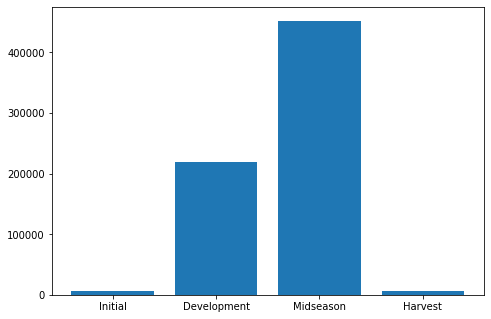

In [54]:
data['period'] = ""
data.loc[data.H < 20, 'period'] = 'crop dev'
data.loc[(data.H>=20) & (data.H<45), 'period'] = 'sow'
data.loc[(data.H >=45) & (data.H<=90), 'period'] = 'harvest'
data.loc[data.H >90, 'period'] = 'midseason'

data.loc[data["period"]=="sow" , "kc"] = 0.45
data.loc[data["period"]=="crop dev","kc"] = 0.75
data.loc[data["period"]=="midseason","kc"] = 1.15
data.loc[data["period"]=="harvest","kc"] = 0.75

data.loc[(data["T"]<25) & (data["zone"]=="humid") , "ETo"] = 3.5
data.loc[(data["T"]>=25) & (data["zone"]=="humid"), "ETo"] = 5.5

data.loc[(data["T"]<25) & (data["zone"]=="sub humid"), "ETo"] = 5.5
data.loc[(data["T"]>=25) & (data["zone"]=="sub humid"), "ETo"] = 7.5

data.loc[(data["T"]<25) & (data["zone"]=="semi arid"), "ETo"] = 6.5
data.loc[(data["T"]>=25) & (data["zone"]=="semi arid"), "ETo"] = 8.5

data.loc[(data["T"]<25) & (data["zone"]=="arid"), "ETo"] = 7.5
data.loc[(data["T"]>=25) & (data["zone"]=="arid"), "ETo"] = 9.5

data["Etc"] = data["kc"]*data["ETo"]
data

data_sow = data[data["period"]=="sow"]
data_dev = data[data["period"]=="crop dev"]
data_mid = data[data["period"]=="midseason"]
data_harvest = data[data["period"]=="harvest"]


avg_sow = data_sow["M"].mean()
sow_water = (data_sow["Etc"]-(abs(data_sow["M"]-avg_sow)/100)).sum()
avg_dev = data_dev["M"].mean()
dev_water = (data_dev["Etc"]-(abs(data_dev["M"]-avg_dev)/100)).sum()
avg_mid = data_mid["M"].mean()
mid_water = (data_mid["Etc"]-(abs(data_mid["M"]-avg_mid)/100)).sum()
avg_harvest = data_harvest["M"].mean()
harvest_water = (data_harvest["Etc"]-(abs(data_harvest["M"]-avg_harvest)/100)).sum()
water_cotton = sow_water+dev_water+mid_water+harvest_water

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [sow_water,dev_water,mid_water,harvest_water]
ax.bar(season,amt)
print(water_cotton)

## MAIZE

428990.2949932465


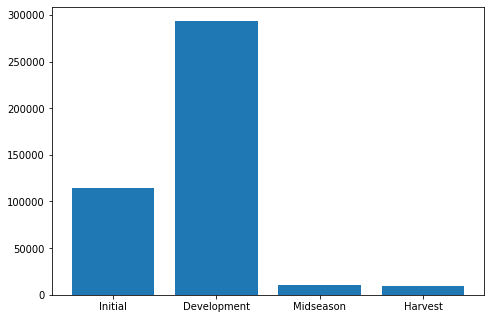

In [57]:
data['period'] = ""
data.loc[data.H < 20, 'period'] = 'sow'
data.loc[(data.H>=20) & (data.H<45), 'period'] = 'harvest'
data.loc[(data.H >=45) & (data.H<=90), 'period'] = 'midseason'
data.loc[data.H >90, 'period'] = 'crop dev'

data.loc[data["period"]=="sow" , "kc"] = 0.40
data.loc[data["period"]=="crop dev","kc"] = 0.75
data.loc[data["period"]=="midseason","kc"] = 1.15
data.loc[data["period"]=="harvest","kc"] = 0.70

data.loc[(data["T"]<25) & (data["zone"]=="humid") , "ETo"] = 3.5
data.loc[(data["T"]>=25) & (data["zone"]=="humid"), "ETo"] = 5.5

data.loc[(data["T"]<25) & (data["zone"]=="sub humid"), "ETo"] = 5.5
data.loc[(data["T"]>=25) & (data["zone"]=="sub humid"), "ETo"] = 7.5

data.loc[(data["T"]<25) & (data["zone"]=="semi arid"), "ETo"] = 6.5
data.loc[(data["T"]>=25) & (data["zone"]=="semi arid"), "ETo"] = 8.5

data.loc[(data["T"]<25) & (data["zone"]=="arid"), "ETo"] = 7.5
data.loc[(data["T"]>=25) & (data["zone"]=="arid"), "ETo"] = 9.5

data["Etc"] = data["kc"]*data["ETo"]
data

data_sow = data[data["period"]=="sow"]
data_dev = data[data["period"]=="crop dev"]
data_mid = data[data["period"]=="midseason"]
data_harvest = data[data["period"]=="harvest"]


avg_sow = data_sow["M"].mean()
sow_water = (data_sow["Etc"]-(abs(data_sow["M"]-avg_sow)/100)).sum()
avg_dev = data_dev["M"].mean()
dev_water = (data_dev["Etc"]-(abs(data_dev["M"]-avg_dev)/100)).sum()
avg_mid = data_mid["M"].mean()
mid_water = (data_mid["Etc"]-(abs(data_mid["M"]-avg_mid)/100)).sum()
avg_harvest = data_harvest["M"].mean()
harvest_water = (data_harvest["Etc"]-(abs(data_harvest["M"]-avg_harvest)/100)).sum()
water_maize = sow_water+dev_water+mid_water+harvest_water

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [sow_water,dev_water,mid_water,harvest_water]
ax.bar(season,amt)
print(water_maize)

<BarContainer object of 4 artists>

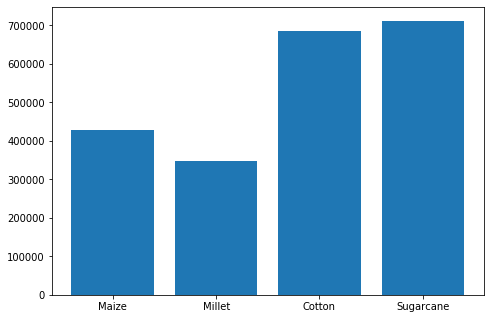

In [58]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Maize', 'Millet', 'Cotton', 'Sugarcane']
amt = [water_maize,water_millet,water_cotton,water_sugar]
ax.bar(season,amt)

## END OF METHOD 2

In [33]:
data_dev[data_dev["M"]<65]


,T,M,H,zone,period,kc,ETo,Etc
72144,28,63,68,sub humid,crop dev,0.75,7.5,5.625
72145,28,62,57,sub humid,crop dev,0.75,7.5,5.625
72146,28,60,58,sub humid,crop dev,0.75,7.5,5.625
72147,28,62,52,sub humid,crop dev,0.75,7.5,5.625
72148,28,63,68,sub humid,crop dev,0.75,7.5,5.625
72422,28,63,73,sub humid,crop dev,0.75,7.5,5.625
72424,28,64,73,sub humid,crop dev,0.75,7.5,5.625


In [10]:
avg = data["M"].mean()
(data["Etc"]-(abs(data["M"]-avg)/100)).sum()
avg

64.32277253693312

## Crop coefficient values for the crops considered:

Kc values at :  Initial | Crop development | Mid-season | Harvest stages\
Cotton - Humid\
Kc  :  0.45 0.75 1.15 0.75

Sugarcane - Humid\
Kc :  0.45 0.85 1.15 0.65

Maize - Arid\
Kc :  0.40 0.75 1.15 0.70

Millet/Sorghum - Arid\
Kc : 0.35 0.75 1.10 0.65

## Analysis of Cotton Crop

In [6]:
d_cotton = data[data["zone"]=="humid"]
d_cotton["ETc1"] = d_cotton["ETo"]*0.45
d_cotton["ETc2"] = d_cotton["ETo"]*0.75
d_cotton["ETc3"] = d_cotton["ETo"]*1.15
d_cotton["ETc4"] = d_cotton["ETo"]*0.75

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [7]:
avg = d_cotton["M"].mean()
d_cotton["water-initial"] = d_cotton["ETc1"]-(abs(d_cotton["M"]-avg)/100)
d_cotton["water-development"] = d_cotton["ETc2"] - (abs(d_cotton["M"]-avg)/100)
d_cotton["water-midseason"] = d_cotton["ETc3"] - (abs(d_cotton["M"]-avg)/100)
d_cotton["water-harvest"] = d_cotton["ETc4"] - (abs(d_cotton["M"]-avg)/100)

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [8]:
d_cotton

,T,M,H,zone,ETo,ETc1,ETc2,ETc3,ETc4,water-initial,water-development,water-midseason,water-harvest
0,30,71,98,humid,5.5,2.475,4.125,6.325,4.125,2.392403,4.042403,6.242403,4.042403
1,33,72,98,humid,5.5,2.475,4.125,6.325,4.125,2.402403,4.052403,6.252403,4.052403
2,30,71,98,humid,5.5,2.475,4.125,6.325,4.125,2.392403,4.042403,6.242403,4.042403
3,30,71,99,humid,5.5,2.475,4.125,6.325,4.125,2.392403,4.042403,6.242403,4.042403
4,30,75,98,humid,5.5,2.475,4.125,6.325,4.125,2.432403,4.082403,6.282403,4.082403
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72553,28,71,81,humid,5.5,2.475,4.125,6.325,4.125,2.392403,4.042403,6.242403,4.042403
72565,28,71,80,humid,5.5,2.475,4.125,6.325,4.125,2.392403,4.042403,6.242403,4.042403
72578,28,71,78,humid,5.5,2.475,4.125,6.325,4.125,2.392403,4.042403,6.242403,4.042403
72596,28,70,80,humid,5.5,2.475,4.125,6.325,4.125,2.382403,4.032403,6.232403,4.032403


<BarContainer object of 4 artists>

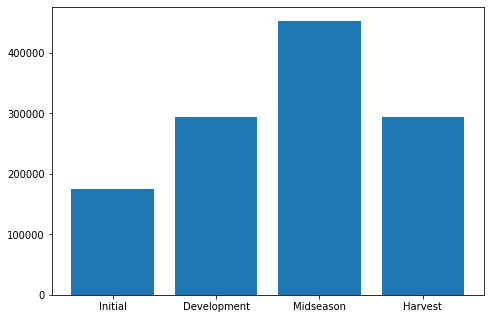

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_cotton["water-initial"].sum(),d_cotton["water-development"].sum(),d_cotton["water-midseason"].sum(), d_cotton["water-harvest"].sum()]
ax.bar(season,amt)

## Analysis of Millet Crop

In [10]:
d_millet = data[data["zone"]=="arid"]
d_millet["ETc1"] = d_millet["ETo"]*0.35
d_millet["ETc2"] = d_millet["ETo"]*0.75
d_millet["ETc3"] = d_millet["ETo"]*1.10
d_millet["ETc4"] = d_millet["ETo"]*0.65

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [11]:
avg = d_millet["M"].mean()
d_millet["water-initial"] = d_millet["ETc1"]-(abs(d_millet["M"]-avg)/100)
d_millet["water-development"] = d_millet["ETc2"] - (abs(d_millet["M"]-avg)/100)
d_millet["water-midseason"] = d_millet["ETc3"] - (abs(d_millet["M"]-avg)/100)
d_millet["water-harvest"] = d_millet["ETc4"] - (abs(d_millet["M"]-avg)/100)

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [12]:
d_millet

,T,M,H,zone,ETo,ETc1,ETc2,ETc3,ETc4,water-initial,water-development,water-midseason,water-harvest
414,30,75,4,arid,9.5,3.325,7.125,10.45,6.175,2.87891,6.67891,10.00391,5.72891
415,30,77,4,arid,9.5,3.325,7.125,10.45,6.175,2.85891,6.65891,9.98391,5.70891
416,30,75,12,arid,9.5,3.325,7.125,10.45,6.175,2.87891,6.67891,10.00391,5.72891
417,31,73,4,arid,9.5,3.325,7.125,10.45,6.175,2.89891,6.69891,10.02391,5.74891
418,30,78,12,arid,9.5,3.325,7.125,10.45,6.175,2.84891,6.64891,9.97391,5.69891
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106742,24,17,8,arid,7.5,2.625,5.625,8.25,4.875,2.49109,5.49109,8.11609,4.74109
106743,24,17,12,arid,7.5,2.625,5.625,8.25,4.875,2.49109,5.49109,8.11609,4.74109
106744,24,17,12,arid,7.5,2.625,5.625,8.25,4.875,2.49109,5.49109,8.11609,4.74109
106745,24,17,14,arid,7.5,2.625,5.625,8.25,4.875,2.49109,5.49109,8.11609,4.74109


<BarContainer object of 4 artists>

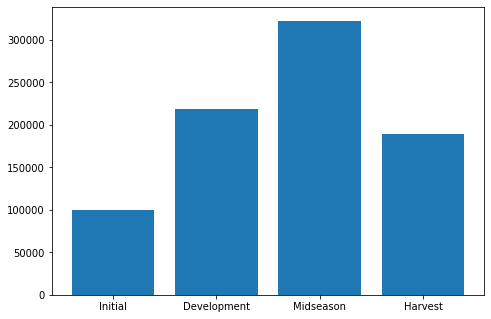

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_millet["water-initial"].sum(),d_millet["water-development"].sum(),d_millet["water-midseason"].sum(), d_millet["water-harvest"].sum()]
ax.bar(season,amt)

## Analysis of Maize crop

In [14]:
d_maize = data[data["zone"]=="arid"]
d_maize["ETc1"] = d_maize["ETo"]*0.40
d_maize["ETc2"] = d_maize["ETo"]*0.75
d_maize["ETc3"] = d_maize["ETo"]*1.15
d_maize["ETc4"] = d_maize["ETo"]*0.70

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [15]:
avg = d_maize["M"].mean()
d_maize["water-initial"] = d_maize["ETc1"]-(abs(d_maize["M"]-avg)/100)
d_maize["water-development"] = d_maize["ETc2"] - (abs(d_maize["M"]-avg)/100)
d_maize["water-midseason"] = d_maize["ETc3"] - (abs(d_maize["M"]-avg)/100)
d_maize["water-harvest"] = d_maize["ETc4"] - (abs(d_maize["M"]-avg)/100)

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [16]:
d_maize

,T,M,H,zone,ETo,ETc1,ETc2,ETc3,ETc4,water-initial,water-development,water-midseason,water-harvest
414,30,75,4,arid,9.5,3.8,7.125,10.925,6.65,3.35391,6.67891,10.47891,6.20391
415,30,77,4,arid,9.5,3.8,7.125,10.925,6.65,3.33391,6.65891,10.45891,6.18391
416,30,75,12,arid,9.5,3.8,7.125,10.925,6.65,3.35391,6.67891,10.47891,6.20391
417,31,73,4,arid,9.5,3.8,7.125,10.925,6.65,3.37391,6.69891,10.49891,6.22391
418,30,78,12,arid,9.5,3.8,7.125,10.925,6.65,3.32391,6.64891,10.44891,6.17391
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106742,24,17,8,arid,7.5,3.0,5.625,8.625,5.25,2.86609,5.49109,8.49109,5.11609
106743,24,17,12,arid,7.5,3.0,5.625,8.625,5.25,2.86609,5.49109,8.49109,5.11609
106744,24,17,12,arid,7.5,3.0,5.625,8.625,5.25,2.86609,5.49109,8.49109,5.11609
106745,24,17,14,arid,7.5,3.0,5.625,8.625,5.25,2.86609,5.49109,8.49109,5.11609


<BarContainer object of 4 artists>

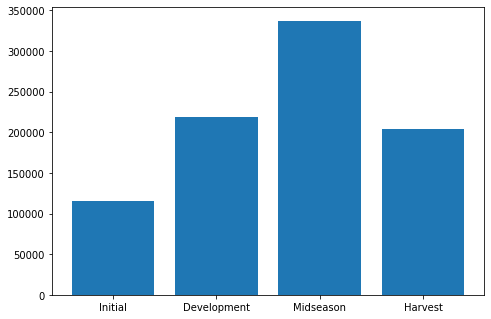

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_maize["water-initial"].sum(),d_maize["water-development"].sum(),d_maize["water-midseason"].sum(), d_maize["water-harvest"].sum()]
ax.bar(season,amt)

# Analysis of sugarcane crop

In [18]:
d_sc = data[data["zone"]=="humid"]
d_sc["ETc1"] = d_sc["ETo"]*0.45
d_sc["ETc2"] = d_sc["ETo"]*0.85
d_sc["ETc3"] = d_sc["ETo"]*1.15
d_sc["ETc4"] = d_sc["ETo"]*0.65


avg = d_sc["M"].mean()
d_sc["water-initial"] = d_sc["ETc1"]-(abs(d_sc["M"]-avg)/100)
d_sc["water-development"] = d_sc["ETc2"] - (abs(d_sc["M"]-avg)/100)
d_sc["water-midseason"] = d_sc["ETc3"] - (abs(d_sc["M"]-avg)/100)
d_sc["water-harvest"] = d_sc["ETc4"] - (abs(d_sc["M"]-avg)/100)

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

<BarContainer object of 4 artists>

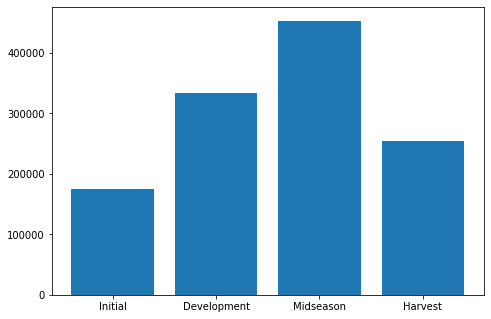

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_sc["water-initial"].sum(),d_sc["water-development"].sum(),d_sc["water-midseason"].sum(), d_sc["water-harvest"].sum()]
ax.bar(season,amt)

# Comparison of irrigation requirement of all the above crops

In [27]:
total_cotton=d_cotton["water-initial"].sum()+d_cotton["water-development"].sum()+d_cotton["water-midseason"].sum()+ d_cotton["water-harvest"].sum()
total_maize=d_maize["water-initial"].sum()+d_maize["water-development"].sum()+d_maize["water-midseason"].sum()+ d_maize["water-harvest"].sum()
total_millet=d_millet["water-initial"].sum()+d_millet["water-development"].sum()+d_millet["water-midseason"].sum()+ d_millet["water-harvest"].sum()
total_sc=d_sc["water-initial"].sum()+d_sc["water-development"].sum()+d_sc["water-midseason"].sum()+ d_sc["water-harvest"].sum()

<BarContainer object of 4 artists>

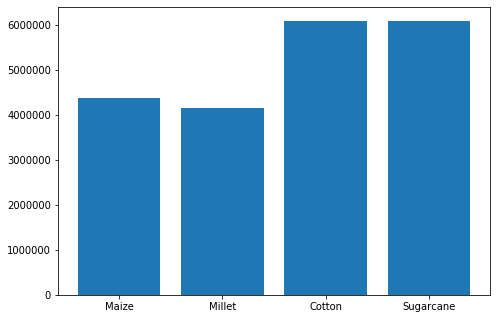

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
crop = ['Maize', 'Millet','Cotton','Sugarcane']
amt = [total_maize,total_millet,total_cotton,total_sc]
ax.bar(crop,amt)

In [29]:
amt

[4375407.7721088, 4152819.0221088007, 6090423.9908929765, 6090423.9908929765]

# Repeating data - 5 times

In [36]:
data_new = data.copy()

In [37]:
frames = [data_new,data_new,data_new,data_new,data_new]
newdat = pd.concat(frames)

In [38]:
newdat['zone'] = ""
newdat.loc[newdat.H < 20, 'zone'] = 'arid'
newdat.loc[(newdat.H>=20) & (newdat.H<50), 'zone'] = 'semi arid'
newdat.loc[(newdat.H >=50) & (newdat.H<75), 'zone'] = 'sub humid'
newdat.loc[newdat.H >=75, 'zone'] = 'humid'

In [39]:
newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="humid") , "ETo"] = 3.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="humid"), "ETo"] = 5.5

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="sub humid"), "ETo"] = 5.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="sub humid"), "ETo"] = 7.5

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="semi arid"), "ETo"] = 6.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="semi arid"), "ETo"] = 8.5

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="arid"), "ETo"] = 7.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="arid"), "ETo"] = 9.5

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

<BarContainer object of 4 artists>

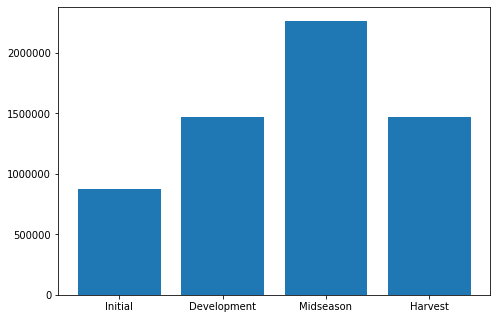

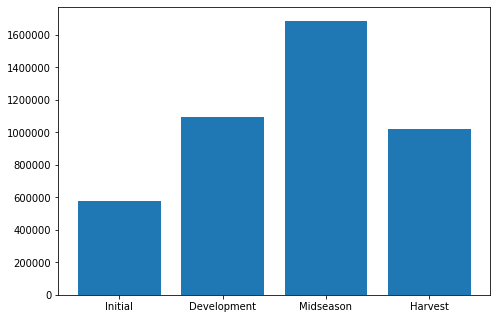

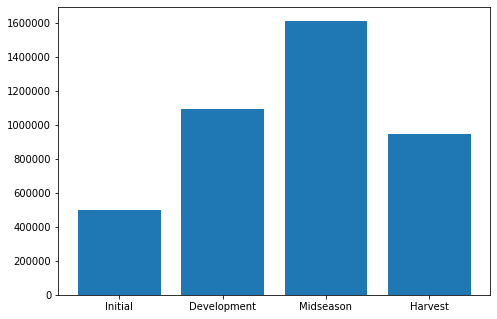

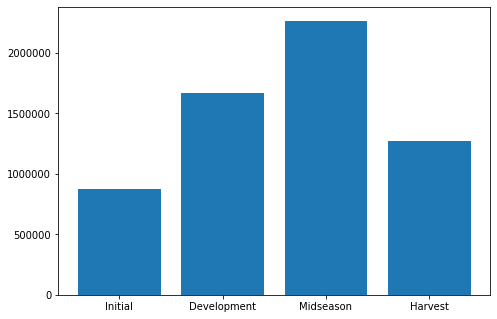

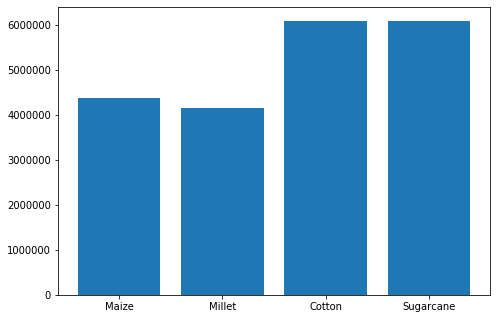

In [40]:
d_cotton = newdat[newdat["zone"]=="humid"]
d_cotton["ETc1"] = d_cotton["ETo"]*0.45
d_cotton["ETc2"] = d_cotton["ETo"]*0.75
d_cotton["ETc3"] = d_cotton["ETo"]*1.15
d_cotton["ETc4"] = d_cotton["ETo"]*0.75

avg = d_cotton["M"].mean()
d_cotton["water-initial"] = d_cotton["ETc1"]-(abs(d_cotton["M"]-avg)/100)
d_cotton["water-development"] = d_cotton["ETc2"] - (abs(d_cotton["M"]-avg)/100)
d_cotton["water-midseason"] = d_cotton["ETc3"] - (abs(d_cotton["M"]-avg)/100)
d_cotton["water-harvest"] = d_cotton["ETc4"] - (abs(d_cotton["M"]-avg)/100)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_cotton["water-initial"].sum(),d_cotton["water-development"].sum(),d_cotton["water-midseason"].sum(), d_cotton["water-harvest"].sum()]
ax.bar(season,amt)



d_maize = newdat[newdat["zone"]=="arid"]
d_maize["ETc1"] = d_maize["ETo"]*0.40
d_maize["ETc2"] = d_maize["ETo"]*0.75
d_maize["ETc3"] = d_maize["ETo"]*1.15
d_maize["ETc4"] = d_maize["ETo"]*0.70
avg = d_maize["M"].mean()
d_maize["water-initial"] = d_maize["ETc1"]-(abs(d_maize["M"]-avg)/100)
d_maize["water-development"] = d_maize["ETc2"] - (abs(d_maize["M"]-avg)/100)
d_maize["water-midseason"] = d_maize["ETc3"] - (abs(d_maize["M"]-avg)/100)
d_maize["water-harvest"] = d_maize["ETc4"] - (abs(d_maize["M"]-avg)/100)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_maize["water-initial"].sum(),d_maize["water-development"].sum(),d_maize["water-midseason"].sum(), d_maize["water-harvest"].sum()]
ax.bar(season,amt)




d_millet = newdat[newdat["zone"]=="arid"]
d_millet["ETc1"] = d_millet["ETo"]*0.35
d_millet["ETc2"] = d_millet["ETo"]*0.75
d_millet["ETc3"] = d_millet["ETo"]*1.10
d_millet["ETc4"] = d_millet["ETo"]*0.65
avg = d_millet["M"].mean()
d_millet["water-initial"] = d_millet["ETc1"]-(abs(d_millet["M"]-avg)/100)
d_millet["water-development"] = d_millet["ETc2"] - (abs(d_millet["M"]-avg)/100)
d_millet["water-midseason"] = d_millet["ETc3"] - (abs(d_millet["M"]-avg)/100)
d_millet["water-harvest"] = d_millet["ETc4"] - (abs(d_millet["M"]-avg)/100)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_millet["water-initial"].sum(),d_millet["water-development"].sum(),d_millet["water-midseason"].sum(), d_millet["water-harvest"].sum()]
ax.bar(season,amt)



d_sc = newdat[newdat["zone"]=="humid"]
d_sc["ETc1"] = d_sc["ETo"]*0.45
d_sc["ETc2"] = d_sc["ETo"]*0.85
d_sc["ETc3"] = d_sc["ETo"]*1.15
d_sc["ETc4"] = d_sc["ETo"]*0.65

avg = d_sc["M"].mean()
d_sc["water-initial"] = d_sc["ETc1"]-(abs(d_sc["M"]-avg)/100)
d_sc["water-development"] = d_sc["ETc2"] - (abs(d_sc["M"]-avg)/100)
d_sc["water-midseason"] = d_sc["ETc3"] - (abs(d_sc["M"]-avg)/100)
d_sc["water-harvest"] = d_sc["ETc4"] - (abs(d_sc["M"]-avg)/100)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_sc["water-initial"].sum(),d_sc["water-development"].sum(),d_sc["water-midseason"].sum(), d_sc["water-harvest"].sum()]
ax.bar(season,amt)




total_cotton=d_cotton["water-initial"].sum()+d_cotton["water-development"].sum()+d_cotton["water-midseason"].sum()+ d_cotton["water-harvest"].sum()
total_maize=d_maize["water-initial"].sum()+d_maize["water-development"].sum()+d_maize["water-midseason"].sum()+ d_maize["water-harvest"].sum()
total_millet=d_millet["water-initial"].sum()+d_millet["water-development"].sum()+d_millet["water-midseason"].sum()+ d_millet["water-harvest"].sum()
total_sc=d_sc["water-initial"].sum()+d_sc["water-development"].sum()+d_sc["water-midseason"].sum()+ d_sc["water-harvest"].sum()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
crop = ['Maize', 'Millet','Cotton','Sugarcane']
amt = [total_maize,total_millet,total_cotton,total_sc]
ax.bar(crop,amt)

In [41]:
amt

[4375407.7721088, 4152819.0221088007, 6090423.9908929765, 6090423.9908929765]

# Repeating data - 10 times

In [42]:
frames = [data_new,data_new,data_new,data_new,data_new,data_new,data_new,data_new,data_new,data_new]
newdat = pd.concat(frames)

In [43]:
newdat['zone'] = ""
newdat.loc[newdat.H < 20, 'zone'] = 'arid'
newdat.loc[(newdat.H>=20) & (newdat.H<50), 'zone'] = 'semi arid'
newdat.loc[(newdat.H >=50) & (newdat.H<75), 'zone'] = 'sub humid'
newdat.loc[newdat.H >=75, 'zone'] = 'humid'

In [44]:
newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="humid") , "ETo"] = 3.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="humid"), "ETo"] = 5.5

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="sub humid"), "ETo"] = 5.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="sub humid"), "ETo"] = 7.5

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="semi arid"), "ETo"] = 6.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="semi arid"), "ETo"] = 8.5

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="arid"), "ETo"] = 7.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="arid"), "ETo"] = 9.5

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

<BarContainer object of 4 artists>

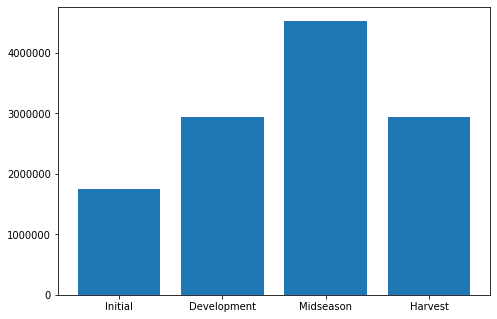

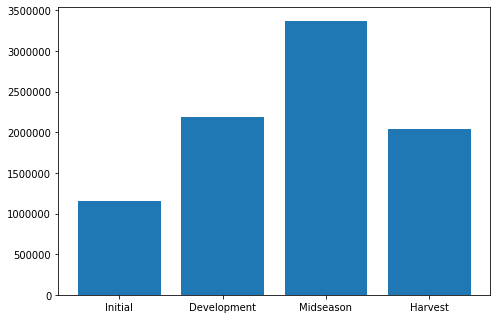

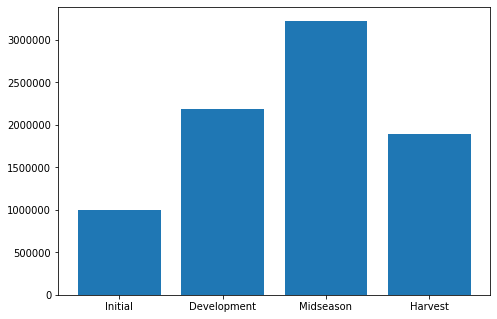

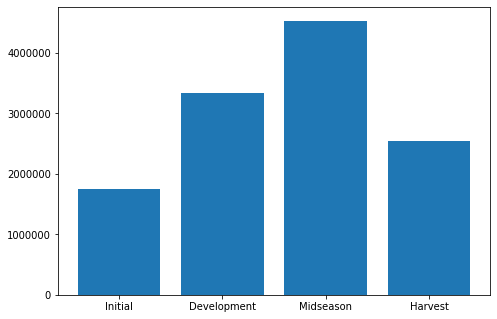

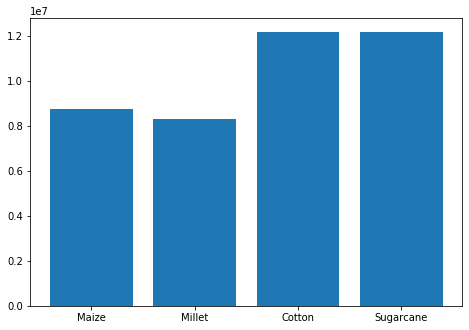

In [45]:
d_cotton = newdat[newdat["zone"]=="humid"]
d_cotton["ETc1"] = d_cotton["ETo"]*0.45
d_cotton["ETc2"] = d_cotton["ETo"]*0.75
d_cotton["ETc3"] = d_cotton["ETo"]*1.15
d_cotton["ETc4"] = d_cotton["ETo"]*0.75

avg = d_cotton["M"].mean()
d_cotton["water-initial"] = d_cotton["ETc1"]-(abs(d_cotton["M"]-avg)/100)
d_cotton["water-development"] = d_cotton["ETc2"] - (abs(d_cotton["M"]-avg)/100)
d_cotton["water-midseason"] = d_cotton["ETc3"] - (abs(d_cotton["M"]-avg)/100)
d_cotton["water-harvest"] = d_cotton["ETc4"] - (abs(d_cotton["M"]-avg)/100)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_cotton["water-initial"].sum(),d_cotton["water-development"].sum(),d_cotton["water-midseason"].sum(), d_cotton["water-harvest"].sum()]
ax.bar(season,amt)



d_maize = newdat[newdat["zone"]=="arid"]
d_maize["ETc1"] = d_maize["ETo"]*0.40
d_maize["ETc2"] = d_maize["ETo"]*0.75
d_maize["ETc3"] = d_maize["ETo"]*1.15
d_maize["ETc4"] = d_maize["ETo"]*0.70
avg = d_maize["M"].mean()
d_maize["water-initial"] = d_maize["ETc1"]-(abs(d_maize["M"]-avg)/100)
d_maize["water-development"] = d_maize["ETc2"] - (abs(d_maize["M"]-avg)/100)
d_maize["water-midseason"] = d_maize["ETc3"] - (abs(d_maize["M"]-avg)/100)
d_maize["water-harvest"] = d_maize["ETc4"] - (abs(d_maize["M"]-avg)/100)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_maize["water-initial"].sum(),d_maize["water-development"].sum(),d_maize["water-midseason"].sum(), d_maize["water-harvest"].sum()]
ax.bar(season,amt)




d_millet = newdat[newdat["zone"]=="arid"]
d_millet["ETc1"] = d_millet["ETo"]*0.35
d_millet["ETc2"] = d_millet["ETo"]*0.75
d_millet["ETc3"] = d_millet["ETo"]*1.10
d_millet["ETc4"] = d_millet["ETo"]*0.65
avg = d_millet["M"].mean()
d_millet["water-initial"] = d_millet["ETc1"]-(abs(d_millet["M"]-avg)/100)
d_millet["water-development"] = d_millet["ETc2"] - (abs(d_millet["M"]-avg)/100)
d_millet["water-midseason"] = d_millet["ETc3"] - (abs(d_millet["M"]-avg)/100)
d_millet["water-harvest"] = d_millet["ETc4"] - (abs(d_millet["M"]-avg)/100)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_millet["water-initial"].sum(),d_millet["water-development"].sum(),d_millet["water-midseason"].sum(), d_millet["water-harvest"].sum()]
ax.bar(season,amt)



d_sc = newdat[newdat["zone"]=="humid"]
d_sc["ETc1"] = d_sc["ETo"]*0.45
d_sc["ETc2"] = d_sc["ETo"]*0.85
d_sc["ETc3"] = d_sc["ETo"]*1.15
d_sc["ETc4"] = d_sc["ETo"]*0.65

avg = d_sc["M"].mean()
d_sc["water-initial"] = d_sc["ETc1"]-(abs(d_sc["M"]-avg)/100)
d_sc["water-development"] = d_sc["ETc2"] - (abs(d_sc["M"]-avg)/100)
d_sc["water-midseason"] = d_sc["ETc3"] - (abs(d_sc["M"]-avg)/100)
d_sc["water-harvest"] = d_sc["ETc4"] - (abs(d_sc["M"]-avg)/100)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_sc["water-initial"].sum(),d_sc["water-development"].sum(),d_sc["water-midseason"].sum(), d_sc["water-harvest"].sum()]
ax.bar(season,amt)




total_cotton=d_cotton["water-initial"].sum()+d_cotton["water-development"].sum()+d_cotton["water-midseason"].sum()+ d_cotton["water-harvest"].sum()
total_maize=d_maize["water-initial"].sum()+d_maize["water-development"].sum()+d_maize["water-midseason"].sum()+ d_maize["water-harvest"].sum()
total_millet=d_millet["water-initial"].sum()+d_millet["water-development"].sum()+d_millet["water-midseason"].sum()+ d_millet["water-harvest"].sum()
total_sc=d_sc["water-initial"].sum()+d_sc["water-development"].sum()+d_sc["water-midseason"].sum()+ d_sc["water-harvest"].sum()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
crop = ['Maize', 'Millet','Cotton','Sugarcane']
amt = [total_maize,total_millet,total_cotton,total_sc]
ax.bar(crop,amt)

In [46]:
amt

[8750815.544217601, 8305638.044217601, 12180847.98178595, 12180847.98178595]

# Repeating data - 15 times

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Gowri\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-

<BarContainer object of 4 artists>

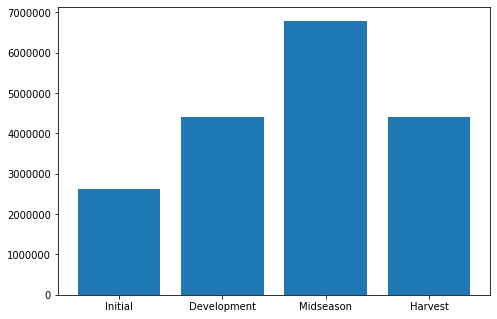

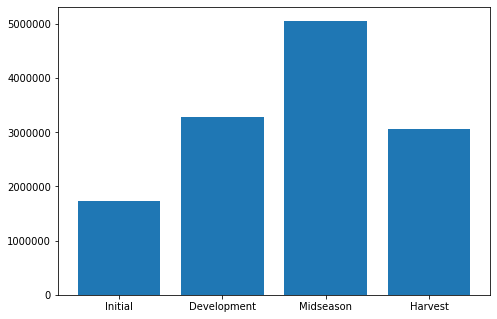

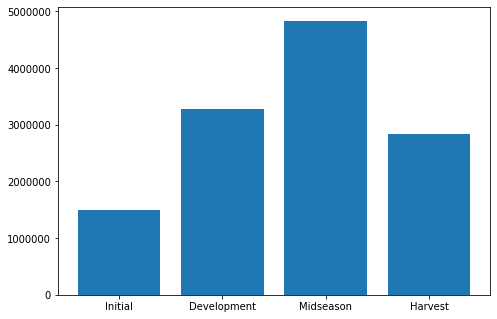

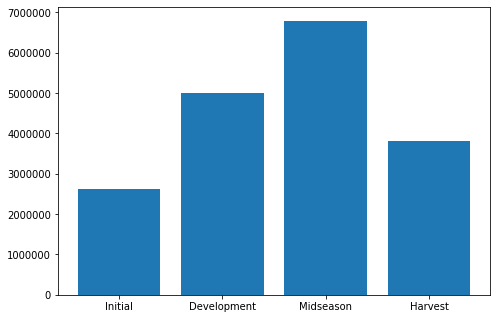

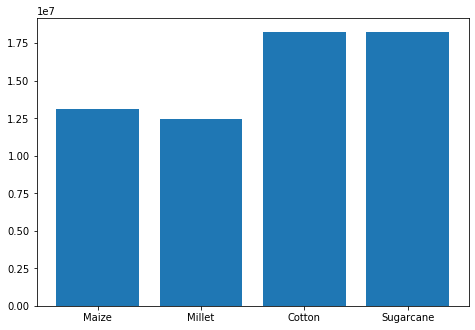

In [47]:
frames = [data_new,data_new,data_new,data_new,data_new,data_new,data_new,data_new,data_new,data_new,data_new,data_new,data_new,data_new,data_new]
newdat = pd.concat(frames)

newdat['zone'] = ""
newdat.loc[newdat.H < 20, 'zone'] = 'arid'
newdat.loc[(newdat.H>=20) & (newdat.H<50), 'zone'] = 'semi arid'
newdat.loc[(newdat.H >=50) & (newdat.H<75), 'zone'] = 'sub humid'
newdat.loc[newdat.H >=75, 'zone'] = 'humid'

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="humid") , "ETo"] = 3.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="humid"), "ETo"] = 5.5

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="sub humid"), "ETo"] = 5.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="sub humid"), "ETo"] = 7.5

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="semi arid"), "ETo"] = 6.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="semi arid"), "ETo"] = 8.5

newdat.loc[(newdat["T"]<25) & (newdat["zone"]=="arid"), "ETo"] = 7.5
newdat.loc[(newdat["T"]>=25) & (newdat["zone"]=="arid"), "ETo"] = 9.5

d_cotton = newdat[newdat["zone"]=="humid"]
d_cotton["ETc1"] = d_cotton["ETo"]*0.45
d_cotton["ETc2"] = d_cotton["ETo"]*0.75
d_cotton["ETc3"] = d_cotton["ETo"]*1.15
d_cotton["ETc4"] = d_cotton["ETo"]*0.75

avg = d_cotton["M"].mean()
d_cotton["water-initial"] = d_cotton["ETc1"]-(abs(d_cotton["M"]-avg)/100)
d_cotton["water-development"] = d_cotton["ETc2"] - (abs(d_cotton["M"]-avg)/100)
d_cotton["water-midseason"] = d_cotton["ETc3"] - (abs(d_cotton["M"]-avg)/100)
d_cotton["water-harvest"] = d_cotton["ETc4"] - (abs(d_cotton["M"]-avg)/100)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_cotton["water-initial"].sum(),d_cotton["water-development"].sum(),d_cotton["water-midseason"].sum(), d_cotton["water-harvest"].sum()]
ax.bar(season,amt)



d_maize = newdat[newdat["zone"]=="arid"]
d_maize["ETc1"] = d_maize["ETo"]*0.40
d_maize["ETc2"] = d_maize["ETo"]*0.75
d_maize["ETc3"] = d_maize["ETo"]*1.15
d_maize["ETc4"] = d_maize["ETo"]*0.70
avg = d_maize["M"].mean()
d_maize["water-initial"] = d_maize["ETc1"]-(abs(d_maize["M"]-avg)/100)
d_maize["water-development"] = d_maize["ETc2"] - (abs(d_maize["M"]-avg)/100)
d_maize["water-midseason"] = d_maize["ETc3"] - (abs(d_maize["M"]-avg)/100)
d_maize["water-harvest"] = d_maize["ETc4"] - (abs(d_maize["M"]-avg)/100)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_maize["water-initial"].sum(),d_maize["water-development"].sum(),d_maize["water-midseason"].sum(), d_maize["water-harvest"].sum()]
ax.bar(season,amt)




d_millet = newdat[newdat["zone"]=="arid"]
d_millet["ETc1"] = d_millet["ETo"]*0.35
d_millet["ETc2"] = d_millet["ETo"]*0.75
d_millet["ETc3"] = d_millet["ETo"]*1.10
d_millet["ETc4"] = d_millet["ETo"]*0.65
avg = d_millet["M"].mean()
d_millet["water-initial"] = d_millet["ETc1"]-(abs(d_millet["M"]-avg)/100)
d_millet["water-development"] = d_millet["ETc2"] - (abs(d_millet["M"]-avg)/100)
d_millet["water-midseason"] = d_millet["ETc3"] - (abs(d_millet["M"]-avg)/100)
d_millet["water-harvest"] = d_millet["ETc4"] - (abs(d_millet["M"]-avg)/100)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_millet["water-initial"].sum(),d_millet["water-development"].sum(),d_millet["water-midseason"].sum(), d_millet["water-harvest"].sum()]
ax.bar(season,amt)



d_sc = newdat[newdat["zone"]=="humid"]
d_sc["ETc1"] = d_sc["ETo"]*0.45
d_sc["ETc2"] = d_sc["ETo"]*0.85
d_sc["ETc3"] = d_sc["ETo"]*1.15
d_sc["ETc4"] = d_sc["ETo"]*0.65

avg = d_sc["M"].mean()
d_sc["water-initial"] = d_sc["ETc1"]-(abs(d_sc["M"]-avg)/100)
d_sc["water-development"] = d_sc["ETc2"] - (abs(d_sc["M"]-avg)/100)
d_sc["water-midseason"] = d_sc["ETc3"] - (abs(d_sc["M"]-avg)/100)
d_sc["water-harvest"] = d_sc["ETc4"] - (abs(d_sc["M"]-avg)/100)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
season = ['Initial', 'Development', 'Midseason', 'Harvest']
amt = [d_sc["water-initial"].sum(),d_sc["water-development"].sum(),d_sc["water-midseason"].sum(), d_sc["water-harvest"].sum()]
ax.bar(season,amt)




total_cotton=d_cotton["water-initial"].sum()+d_cotton["water-development"].sum()+d_cotton["water-midseason"].sum()+ d_cotton["water-harvest"].sum()
total_maize=d_maize["water-initial"].sum()+d_maize["water-development"].sum()+d_maize["water-midseason"].sum()+ d_maize["water-harvest"].sum()
total_millet=d_millet["water-initial"].sum()+d_millet["water-development"].sum()+d_millet["water-midseason"].sum()+ d_millet["water-harvest"].sum()
total_sc=d_sc["water-initial"].sum()+d_sc["water-development"].sum()+d_sc["water-midseason"].sum()+ d_sc["water-harvest"].sum()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
crop = ['Maize', 'Millet','Cotton','Sugarcane']
amt = [total_maize,total_millet,total_cotton,total_sc]
ax.bar(crop,amt)

In [48]:
amt

[13126223.316326398, 12458457.066326402, 18271271.97267893, 18271271.97267893]

In [73]:
d_millet["water-initial"].sum()+d_millet["water-development"].sum()+d_millet["water-midseason"].sum()+ d_millet["water-harvest"].sum()

830563.8044217601